In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import interpolate

from astropy import constants as const
from astropy import units as u

from plotting_spectra import *

rc_params = {
    'lines.linewidth': 2,  # Set line width to 2 points
    'font.family': 'STIXGeneral',  # Set color cycle for axes
    'ytick.direction': 'in',  # Set figure size in inches
    'xtick.direction': 'in',  # Set default font family
}

plt.rcParams.update(rc_params)

In [3]:
spectra_metadata = pd.read_csv('wiserep_spectra_metadata.csv', low_memory=False)
spectra_data     = pd.read_pickle('spectra_ALeRCE20240704_x_wisrep_20240622.pkl')

In [5]:
spectra_data.head(3)

,oid,snname,instrument,mjd,lambda_grid_min,lambda_grid_max,nlambda_grid,lambda_data_min,lambda_data_max,flux_lambda,e_flux_lambda
0,NaN,SN2022pru,Lick-3m_KAST,59788.215972,3206.34,10915.01,1838,3504.527001,10393.131809,"[2.2633771763432984, 2.7388705744561315, 2.365...","[0.21898910712578754, 0.1979063641775711, 0.18..."
1,NaN,SN2022ytx,LT_SPRAT,59886.979942,3206.34,10915.01,1838,4047.600000,7994.400000,"[-1.149378218494491, -0.4815124591937457, 0.58...","[0.02170248062794458, 0.36034818699792165, 0.2..."
2,NaN,SN2022ytx,LT_SPRAT,59907.898866,3206.34,10915.01,1838,4066.000000,7994.400000,"[0.5816700646397295, 0.42704860952865736, 0.28...","[0.2633190522450036, 0.12698204152460923, 0.16..."


In [16]:
spectra_data.columns, spectra_data.shape

(Index(['oid', 'snname', 'instrument', 'mjd', 'lambda_grid_min',
        'lambda_grid_max', 'nlambda_grid', 'lambda_data_min', 'lambda_data_max',
        'flux_lambda', 'e_flux_lambda'],
       dtype='object'),
 (25953, 11))

In [3]:
spectra_data.lambda_grid_min

0        3206.34
1        3206.34
2        3206.34
3        3206.34
4        3206.34
          ...   
25948    3206.34
25949    3206.34
25950    3206.34
25951    3206.34
25952    3206.34
Name: lambda_grid_min, Length: 25953, dtype: float64

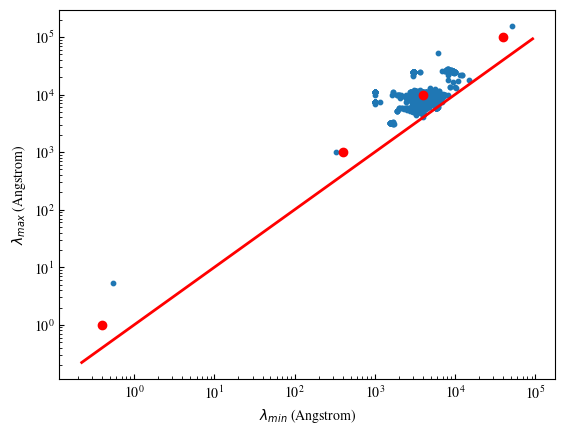

In [4]:
fig,ax =plt.subplots()
ax.scatter(spectra_data.lambda_data_min,spectra_data.lambda_data_max,s=10)

ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(400/1000, 1000/1000, c='r')
ax.scatter(400, 1000, c='r')
ax.scatter(4000, 10000, c='r')
ax.scatter(40000, 100000, c='r')
ax.plot(ax.get_xlim(),ax.get_xlim(),color='red')
ax.set_xlabel(r'$\lambda_{min}$ (Angstrom)')
ax.set_ylabel(r'$\lambda_{max}$ (Angstrom)')

plt.show()

How we could see there are, at leats,thre points outlayer for the line two with a value less than 10^3 and one over 10^4.

These supernovae are:

In [5]:
spectra_data[(spectra_data.lambda_data_min < spectra_data.lambda_grid_min)| (spectra_data.lambda_data_min >spectra_data.lambda_grid_max)][['oid','snname','lambda_data_min','lambda_data_max']]

,oid,snname,lambda_data_min,lambda_data_max
5,ZTF18aahrzkb,SN2020xqj,3200.560090,9998.678015
11,NaN,PTF10ol,3041.062024,10322.394453
12,NaN,PTF10ol,3041.062024,10322.394453
48,NaN,SN2016fhu,3101.020000,10235.775000
69,NaN,PTF10rex,3080.000000,10050.000000
...,...,...,...,...
25913,ZTF21abwycli,SN2021xyh,3060.381800,10294.838000
25922,NaN,PTF12fip,3200.000000,10500.000000
25934,NaN,PTF10qkv,3080.000000,10100.000000
25935,NaN,PTF10qkv,3150.000000,9500.000000


In [6]:
spectra_data[(spectra_data.lambda_data_min < spectra_data.lambda_grid_min)][['oid','snname','lambda_data_min','lambda_data_max']]

,oid,snname,lambda_data_min,lambda_data_max
5,ZTF18aahrzkb,SN2020xqj,3200.560090,9998.678015
11,NaN,PTF10ol,3041.062024,10322.394453
12,NaN,PTF10ol,3041.062024,10322.394453
48,NaN,SN2016fhu,3101.020000,10235.775000
69,NaN,PTF10rex,3080.000000,10050.000000
...,...,...,...,...
25913,ZTF21abwycli,SN2021xyh,3060.381800,10294.838000
25922,NaN,PTF12fip,3200.000000,10500.000000
25934,NaN,PTF10qkv,3080.000000,10100.000000
25935,NaN,PTF10qkv,3150.000000,9500.000000


In [7]:
spectra_data.loc[4236, 'lambda_data_min'] *= 1e4
spectra_data.loc[4236, 'lambda_data_max'] *= 1e4
spectra_data.loc[21198, 'lambda_data_min'] /= 1e1
spectra_data.loc[21198, 'lambda_data_max'] /= 1e1
spectra_data.loc[21334, 'lambda_data_min'] *= 1e1
spectra_data.loc[21334, 'lambda_data_max'] *= 1e1

In [8]:
spectra_data[(spectra_data.lambda_data_min < 1e3) | (spectra_data.lambda_data_min == spectra_data.lambda_data_min.max())][['oid','snname','lambda_data_min','lambda_data_max']]

,oid,snname,lambda_data_min,lambda_data_max
2339,NaN,SN2012il,15000.0,17830.0


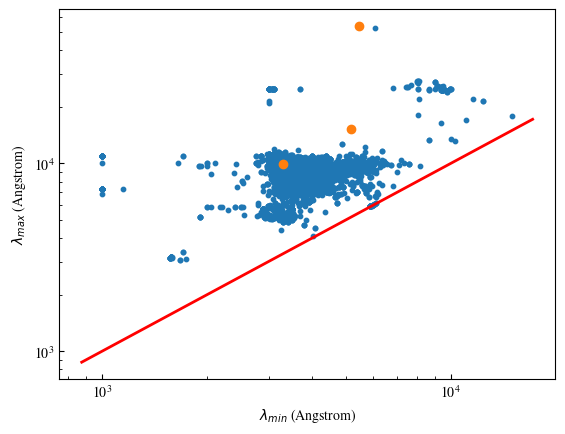

In [9]:
fig,ax =plt.subplots()
ax.scatter(spectra_data.lambda_data_min,spectra_data.lambda_data_max,s=10)

ax.set_yscale('log')
ax.set_xscale('log')
ax.scatter(spectra_data.loc[4236, 'lambda_data_min'], spectra_data.loc[4236, 'lambda_data_max'], c='C1')
ax.scatter(spectra_data.loc[21198, 'lambda_data_min'],spectra_data.loc[21198, 'lambda_data_max'], c='C1')
ax.scatter(spectra_data.loc[21334, 'lambda_data_min'], spectra_data.loc[21334, 'lambda_data_max'], c='C1')
ax.plot(ax.get_xlim(),ax.get_xlim(),color='red')
ax.set_xlabel(r'$\lambda_{min}$ (Angstrom)')
ax.set_ylabel(r'$\lambda_{max}$ (Angstrom)')
#ax.set_xlim(1e0,1e5)
plt.show()

[]

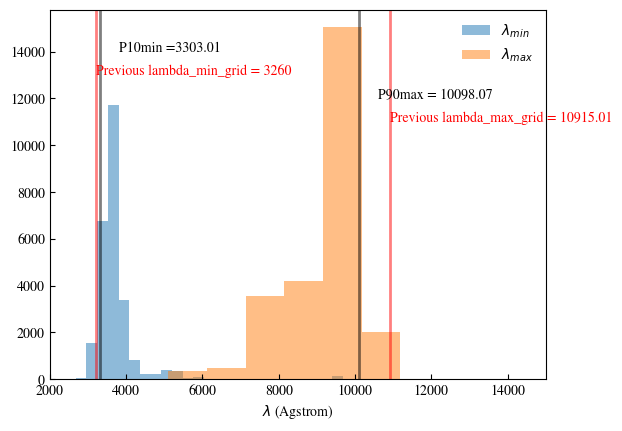

In [11]:
fig, ax = plt.subplots()

ax.hist(spectra_data.lambda_data_min, bins=50, alpha = 0.5, label=r'$\lambda_{min}$')
ax.hist(spectra_data.lambda_data_max, bins=50, alpha = 0.5, label=r'$\lambda_{max}$')
ax.axvline(spectra_data.lambda_data_min.quantile(0.1), color='black', alpha = 0.5,)
ax.axvline(spectra_data.lambda_data_max.quantile(0.9), color='black', alpha = 0.5,)
ax.axvline(3206.34, color='red', alpha = 0.5,)
ax.axvline(10915.01, color='red', alpha = 0.5,)
ax.text(x=3206, y = 13000, s=f'Previous lambda_min_grid = 3260', c='red')
ax.text(x=10915.01, y = 11000, s=f'Previous lambda_max_grid = 10915.01', c='red')
ax.text(x=spectra_data.lambda_data_min.quantile(0.1)+500, y = 14000, s=f'P10min ={spectra_data.lambda_data_min.quantile(0.1):.2f}')
ax.text(x=spectra_data.lambda_data_max.quantile(0.9)+500, y = 12000, s=f'P90max = {spectra_data.lambda_data_max.quantile(0.9):.2f}')
ax.set_xlabel(r'$\lambda$ (Agstrom)')

ax.set_xlim(2000,15000)
ax.legend(frameon=False)
plt.plot()

In [ ]:
# Save the update data
spectra_data     = pd.read_pickle('spectra_ALeRCE20240704_x_wisrep_20240622_lasted_20240717.pkl')